<a href="https://colab.research.google.com/github/panagiotakf/Predicting-Fuel-Consumption-in-Shipping-by-Using-ML/blob/main/Supervised_and_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # for easy dataset import
import sklearn # for simple ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # for data scaling in [0,1]
import pickle # for saving sklearn models
from sklearn.linear_model import LinearRegression # Here you need to import the Multiple Linear Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
# also you need to import the metrics for the final step 7.
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score,f1_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
WHICH_SHIP = 1 # ship to run

In [4]:
# 1. Importing the dataset
dataset = pd.read_csv('cape' +str(WHICH_SHIP) + '.csv')
X = dataset.iloc[:, [0, 1, 4, 5, 8]].values # keep only SOG, STW, DWS, WD and Trim,bring all the rows but keep only the defined columns
y = dataset.iloc[:, 9].values # keep target variable MEP
y = y.reshape(-1, 1) # reshape as 2D array (N,1) (-1 because we are not sure about the number of rows)
X=X.reshape(-1,5) #do we need to reshape X too???

In [5]:
len(X)

21275

In [6]:
# 2. Plot distributions of the features and target variable
X_np=X #save the np arrays you will need them later
y_np=y
X = pd.DataFrame(X, columns = ['SOG','STW','DWS','WD','TRIM']) #first transform np arrays to dataframes
y=pd.DataFrame(y, columns = ['MEP']) #because its easier to depict the distribution




Text(0.5, 0, 'Speed Over Ground (knots)')

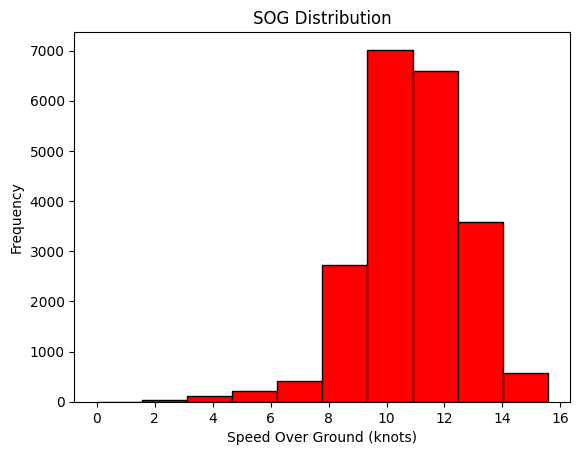

In [7]:
#Plot SOG Distribution
pl=X['SOG'].plot(kind='hist',color='red',edgecolor='black',title='SOG Distribution')
pl.set_xlabel('Speed Over Ground (knots)')

Text(0.5, 0, 'Speed Over Water (knots)')

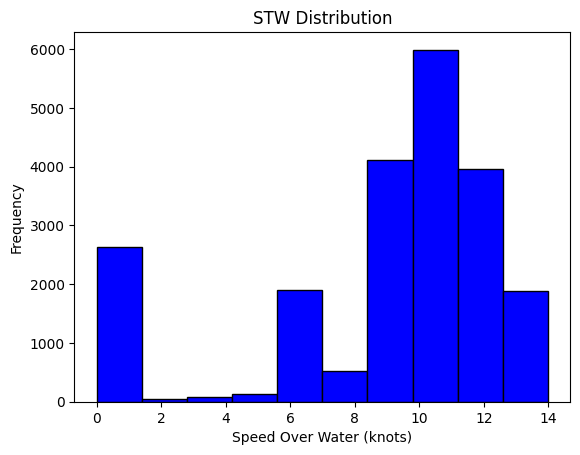

In [8]:
#Plot STW Distribution(knots)
pl=X['STW'].plot(kind='hist',color='blue',edgecolor='black',title='STW Distribution')
pl.set_xlabel('Speed Over Water (knots)')

Text(0.5, 0, 'Discretized Wind Speed (bft)')

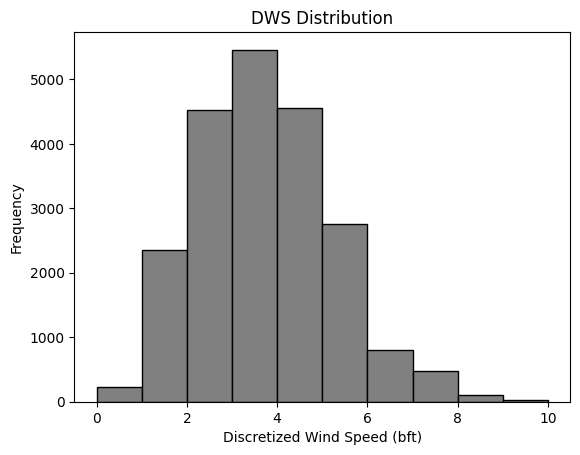

In [9]:
#Plot DWS Distribution(bft)
pl=X['DWS'].plot(kind='hist',color='gray',edgecolor='black',title='DWS Distribution')
pl.set_xlabel('Discretized Wind Speed (bft)')

Text(0.5, 0, 'Wind Direction (degrees)')

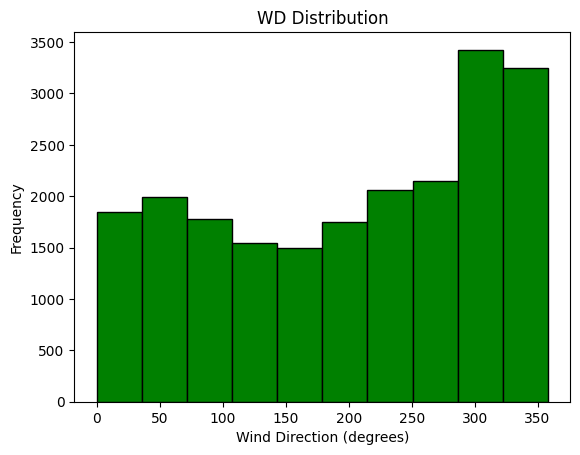

In [10]:
#Plot WD Distribution(degrees)
pl=X['WD'].plot(kind='hist',color='green',edgecolor='black',title='WD Distribution')
pl.set_xlabel('Wind Direction (degrees)')

Text(0.5, 0, 'Trim (meters)')

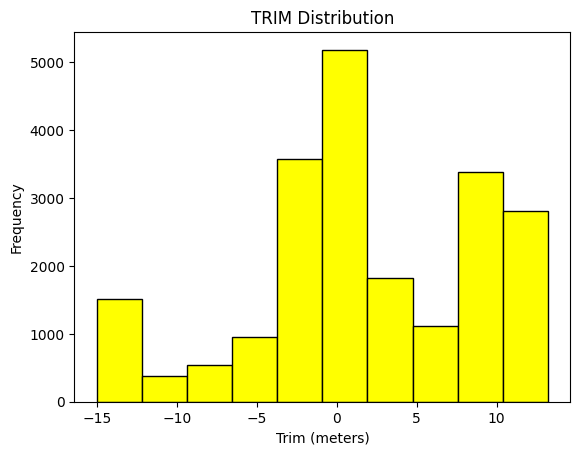

In [12]:
#Plot TRIM Distribution(meter)
pl=X['TRIM'].plot(kind='hist',color='yellow',edgecolor='black',title='TRIM Distribution')
pl.set_xlabel('Trim (meters)')

Text(0.5, 0, 'Main Engine Power (Kwatt)')

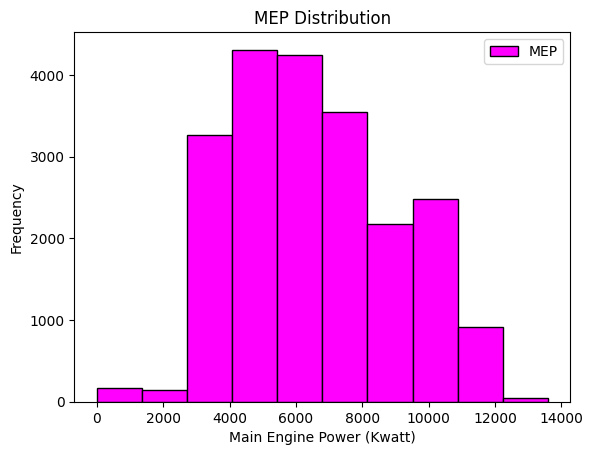

In [13]:
#Plot MEP Distribution (KWatt-xlabel)
pl=y.plot(kind='hist',color='magenta',edgecolor='black',title='MEP Distribution')
pl.set_xlabel('Main Engine Power (Kwatt)')

In [14]:
# 3. Split to 90% training and 10% testing sets
X=X_np
y=y_np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [15]:
# 4. Load MinMaxScaler from sklearn and do scaling in each variable (finally, all values will be in [0,1])
scaler_data=MinMaxScaler()
scaler_labels=MinMaxScaler()

#first use the MinMaxScaler to fit and transform the train data
#fit_transfrom only for the train data NOT!! for test data
X_train=scaler_data.fit_transform(X_train)
y_train=scaler_labels.fit_transform(y_train)
#then scale the test data using the test data scaling
X_test=scaler_data.transform(X_test)
y_test=scaler_labels.transform(y_test)

print(X_train)

[[0.75212738 0.88784068 0.19946631 0.74430896 0.5004852 ]
 [0.74573132 0.801098   0.39959973 0.91089085 0.51858045]
 [0.55785365 0.67845963 0.49966644 0.08410905 0.859801  ]
 ...
 [0.64252708 0.72990419 0.28185457 0.93765307 0.69584188]
 [0.95483784 0.01314365 0.33088726 0.86386623 0.44494801]
 [0.66513492 0.75372826 0.3712475  0.20233697 0.94394518]]


In [16]:
# 5. Train a Multilple Linear Regressor from sklearn on training data
model = LinearRegression() #create the model
model.fit(X_train,y_train) #fit it to the training set

LinearRegression()

In [17]:
#save the model
dbfile = open('Linear_Regression_model', 'ab')
pickle.dump(model,dbfile )
dbfile.close()


In [18]:
#restore the model
dbfile = open('Linear_Regression_model', 'rb')
model= pickle.load(dbfile)
dbfile.close()

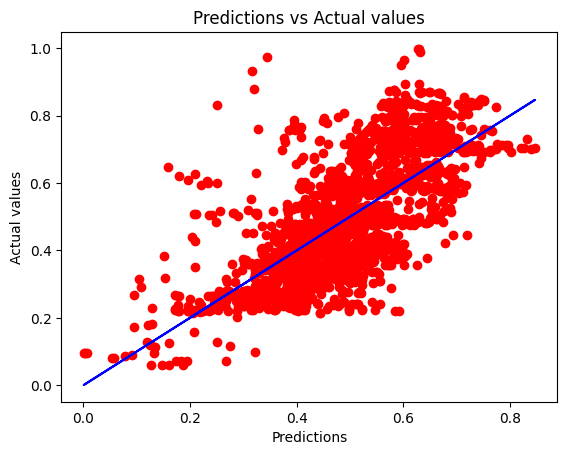

In [19]:
# 6. Plot the predicted and actual values of Main Engine Power in the same plot using the testing set
#we can also plot the line x=y
import matplotlib.pyplot as plt
predictions=model.predict(X_test)
plt.plot(predictions,predictions,color='blue')
plt.scatter(predictions,y_test,color='red')
plt.title('Predictions vs Actual values')
plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.show()

In [20]:
# 7. Calculate the MSE, MAE and MAPE metrics for the predicted vs actual testing samples
lr_mser=mean_squared_error(y_test, predictions)
print('mean_squared_error : ', lr_mser)
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ',mean_absolute_percentage_error(y_test,predictions))

# R_squared, F1 score
print('r2 score : ', r2_score(y_test,predictions))
#print('f1 score : ', f1_score(y_test,predictions))

mean_squared_error :  0.015417799753018633
mean_absolute_error :  0.0965187731510395
mean_absolute_percentage_error :  0.22571492984933386
r2 score :  0.4984244530203532


In [21]:
# Decision trees, SVR's
dt=DecisionTreeRegressor()
svr=SVR()
models=[dt,svr]
mser=[lr_mser]
for model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    mser.append(mean_squared_error(y_test, predictions))



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
svr=SVR()
svr.fit(X_train,y_train)
predictions=svr.predict(X_test)
print(mean_squared_error(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.004631236901093924


In [23]:
print(mser)

[0.015417799753018633, 0.0005639278264022322, 0.004631236901093924]


In [24]:
# Random Forest
random_forest_mser=[]
min_mser=100
for trees in range(20,210,20):
    model=RandomForestRegressor(n_estimators=trees)
    model.fit(X_train,y_train) #as it runs it occurs a ravel() error. Is it important??
    predictions=model.predict(X_test)
    random_forest_mser.append(mean_squared_error(y_test, predictions))
    if(mean_squared_error(y_test, predictions)<min_mser):
        min_mser=mean_squared_error(y_test, predictions)
        model_rf=model


<ipython-input-24-9f568f11b63e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train) #as it runs it occurs a ravel() error. Is it important??
<ipython-input-24-9f568f11b63e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train) #as it runs it occurs a ravel() error. Is it important??
<ipython-input-24-9f568f11b63e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train) #as it runs it occurs a ravel() error. Is it important??
<ipython-input-24-9f568f11b63e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

In [25]:
print(random_forest_mser)

[0.00041989239823629745, 0.0004279343753327606, 0.000437108150194419, 0.00044495819066090424, 0.00039159370329831106, 0.00043548125387680346, 0.0004398369547142252, 0.0004159637836418247, 0.00043496978770882666, 0.0004014551388721996]


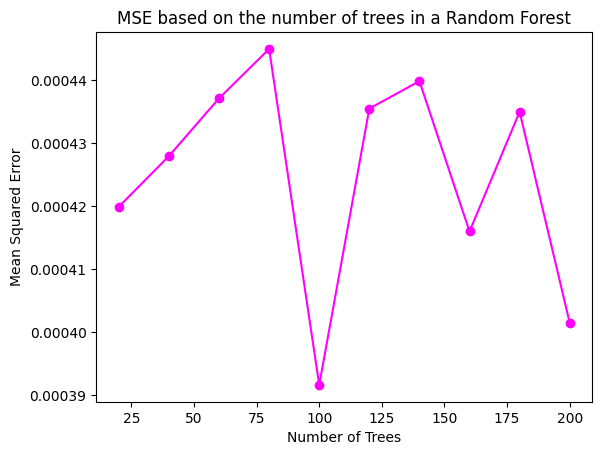

In [26]:
#plot msr/trees
plt.plot(range(20,220,20),random_forest_mser,marker='o',color="magenta")
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error")
plt.title("MSE based on the number of trees in a Random Forest")
plt.show()

In [27]:
#keep only the best msr
mser.append(min(random_forest_mser))

In [28]:
print(mser)

[0.015417799753018633, 0.0005639278264022322, 0.004631236901093924, 0.00039159370329831106]


In [30]:
#MLP
mlp_mser=[]
for lr in list(map(lambda x:10**x, range(-5,0))): #map to create a list with numbers from 10**-5 to 0.1
    model=MLPRegressor(hidden_layer_sizes=(800,600,400), learning_rate_init=lr)
    model.fit(X_train,y_train) #as it runs it occurs a ravel() error. Is it important??
    predictions=model.predict(X_test)
    mlp_mser.append(mean_squared_error(y_test, predictions))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

In [31]:
print(mlp_mser)

[0.007008861478981198, 0.0035232152204647668, 0.0016561613225936187, 0.002173142154019986, 0.04898492655511045]


[1e-05, 0.0001, 0.001, 0.01, 0.1]


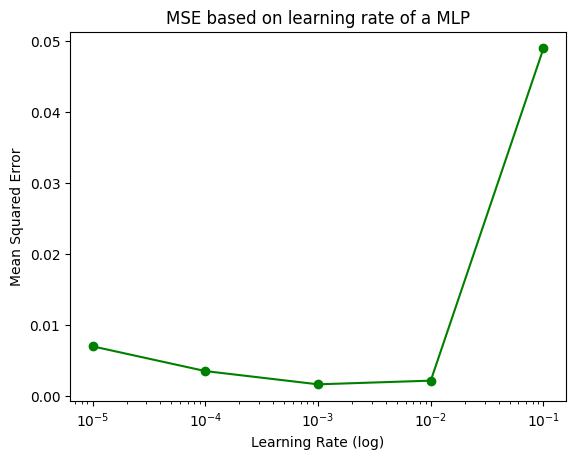

In [32]:
#plot msr/learning rate
print(list(map(lambda x:10**x, range(-5,0))))
plt.plot(list(map(lambda x:10**x, range(-5,0))),mlp_mser,marker='o',color="green")
plt.xscale('log')
plt.xlabel("Learning Rate (log)")
plt.ylabel("Mean Squared Error")
plt.title("MSE based on learning rate of a MLP")
plt.show()

In [33]:
print(mean_squared_error(y_test, predictions))

0.04898492655511045


In [34]:
#keep only the best msr
mlp_mser=[]
mlp_mser.append(mean_squared_error(y_test, predictions))
mser.append(min(mlp_mser))

In [38]:
model_mlp=MLPRegressor(hidden_layer_sizes=(800,600,400), learning_rate_init=0.001)
model_mlp.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(800, 600, 400))

In [39]:
#save optimized MLP model
dbfile = open('Opt_MLP_model', 'ab')
pickle.dump(model_mlp,dbfile )
dbfile.close()
#save optimized RF model
#model_rf=RandomForestRegressor(n_estimators=60).fit(X_train,y_train)
dbfile = open('Opt_RF_model', 'ab')
pickle.dump(model_rf,dbfile )
dbfile.close()
#save DT model
model_dt=DecisionTreeRegressor().fit(X_train,y_train)
dbfile = open('DT_model', 'ab')
pickle.dump(model_dt,dbfile )
dbfile.close()
#save SVR model
model_svr=SVR().fit(X_train,y_train)
dbfile = open('SVR_model', 'ab')
pickle.dump(model_svr,dbfile )
dbfile.close()
#save LR model
model_lr=LinearRegression().fit(X_train,y_train)
dbfile = open('LR_model', 'ab')
pickle.dump(model_lr,dbfile )
dbfile.close()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#open LR
dbfile = open('LR_model', 'rb')
model_lr= pickle.load(dbfile)
dbfile.close()
#open DT model
dbfile = open('DT_model', 'rb')
model_dt= pickle.load(dbfile)
dbfile.close()
#open SVR
dbfile = open('SVR_model', 'rb')
model_svr= pickle.load(dbfile)
dbfile.close()
#open RF model
dbfile = open('Opt_RF_model', 'rb')
model_rf= pickle.load(dbfile)
dbfile.close()
#open MLP model
dbfile = open('Opt_MLP_model', 'rb')
model_mlp= pickle.load(dbfile)
dbfile.close()

In [41]:
#MSER for saved models
models=[model_lr,model_dt,model_svr,model_rf,model_mlp]
mser=[]
for model in models:
    mser.append(mean_squared_error(y_test, model.predict(X_test)))


[0.015417799753018633, 0.0005619982933205813, 0.004631236901093924, 0.00039159370329831106, 0.0019006083506385287]


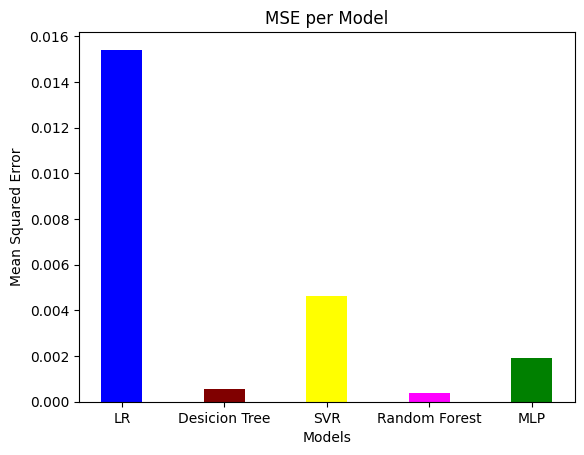

In [42]:

print(mser)
plt.bar(['LR','Desicion Tree','SVR','Random Forest','MLP'],mser,width = 0.4,color=['blue','maroon','yellow','magenta','green'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("MSE per Model")
plt.show()


In [43]:

model_ens_VR=VotingRegressor([('dt', model_dt), ('rf', model_rf), ('mlp', model_mlp)])
model_ens_VR.fit(X_train,y_train)
predictions=model_ens_VR.predict(X_test)
print(mean_squared_error(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.000496147063293905


In [44]:
#save and load voting regressor model
dbfile = open('VotingRegressor_Ensemble_model', 'ab')
pickle.dump(model_ens_VR,dbfile )
dbfile.close()

In [45]:
#load voting regressor model
dbfile = open('VotingRegressor_Ensemble_model', 'rb')
model_ens_VR= pickle.load(dbfile)
dbfile.close()

In [46]:
predictions=model_ens_VR.predict(X_test)
mser.append(mean_squared_error(y_test, predictions))

[0.015417799753018633, 0.0005619982933205813, 0.004631236901093924, 0.00039159370329831106, 0.0019006083506385287, 0.000496147063293905]


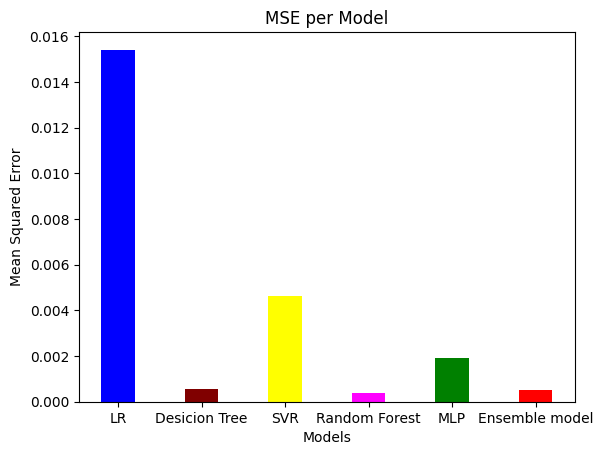

In [47]:
print(mser)
plt.bar(['LR','Desicion Tree','SVR','Random Forest','MLP','Ensemble model'],mser,width = 0.4,color=['blue','maroon','yellow','magenta','green','red'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("MSE per Model")
plt.show()

In [48]:

list_for_mse=[]


#check the number of estimators

for n in range(10,120,20):
    model_ens_Bag=BaggingRegressor(n_estimators=n)
    model_ens_Bag.fit(X_train,y_train)
    predictions=model_ens_Bag.predict(X_test)
    list_for_mse.append(mean_squared_error(y_test, predictions))
'''
#check percent of bootstraping
for per in np.arange(0.1,1.1,0.1):
    model_ens_Bag=BaggingRegressor(n_estimators=55,max_samples=per)
    model_ens_Bag.fit(X_train,y_train)
    predictions=model_ens_Bag.predict(X_test)
    list_for_mse.append(mean_squared_error(y_test, predictions))
'''




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

'\n#check percent of bootstraping\nfor per in np.arange(0.1,1.1,0.1):\n    model_ens_Bag=BaggingRegressor(n_estimators=55,max_samples=per)\n    model_ens_Bag.fit(X_train,y_train)\n    predictions=model_ens_Bag.predict(X_test)\n    list_for_mse.append(mean_squared_error(y_test, predictions))\n'

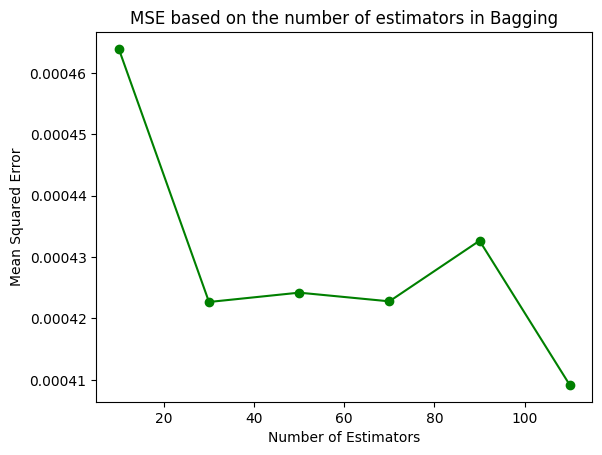

In [49]:
plt.plot(range(10,120,20),list_for_mse,marker='o',color="green")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE based on the number of estimators in Bagging")
plt.show()

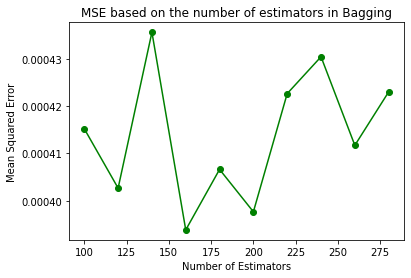

In [ ]:
plt.plot(range(100,300,20),list_for_mse,marker='o',color="green")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE based on the number of estimators in Bagging")
plt.show()

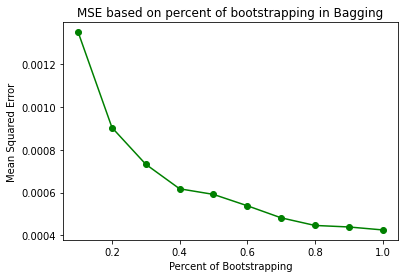

In [ ]:
#plot for n_estimators
plt.plot(np.arange(0.1,1.1,0.1),list_for_mse,marker='o',color="green")
plt.xlabel("Percent of Bootstrapping")
plt.ylabel("Mean Squared Error")
plt.title("MSE based on percent of bootstrapping in Bagging")
plt.show()

In [50]:
model_ens_Bag=BaggingRegressor(n_estimators=110)
model_ens_Bag.fit(X_train,y_train)
predictions=model_ens_Bag.predict(X_test)
print(mean_squared_error(y_test, predictions))

#save and load Bagging model
dbfile = open('Bagging_Ensemble_model', 'ab')
pickle.dump(model_ens_Bag,dbfile )
dbfile.close()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.00040624083089499174


In [51]:
#load Bagging model
dbfile = open('Bagging_Ensemble_model', 'rb')
model_ens_Bag= pickle.load(dbfile)
dbfile.close()

#compute mser
predictions=model_ens_Bag.predict(X_test)
mser.append(mean_squared_error(y_test, predictions))

In [52]:
#AdaBoost
list_for_mse=[]
#code to find the best learning rate

'''for lr in list(map(lambda x:10**x, range(-5,1))):
    model_ens_ABR=AdaBoostRegressor(learning_rate=lr)
    model_ens_ABR.fit(X_train,y_train)
    predictions=model_ens_ABR.predict(X_test)
    list_for_mse.append(mean_squared_error(y_test, predictions))

#plot for n_estimators
plt.plot(list(map(lambda x:10**x, range(-5,1))),list_for_mse,marker='o',color="green")
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.title("MSE based on learning rate in AdaBoost")
plt.show()'''
#code to find the best number of estimators
'''
for n in range(20,220,20):
    model_ens_ABR=AdaBoostRegressor(n_estimators=n,learning_rate=0.1,random_state=0)
    model_ens_ABR.fit(X_train,y_train)
    predictions=model_ens_ABR.predict(X_test)
    list_for_mse.append(mean_squared_error(y_test, predictions))

#plot for n_estimators
plt.plot(range(20,220,20),list_for_mse,marker='o',color="green")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE based on number of estimators in AdaBoost")
plt.show()
'''
#check different models
'''

model_ens_ABR=AdaBoostRegressor(n_estimators=60,learning_rate=0.1,estimator=RandomForestRegressor(n_estimators=140,max_depth=1))
model_ens_ABR.fit(X_train,y_train)
predictions=model_ens_ABR.predict(X_test)
list_for_mse.append(mean_squared_error(y_test, predictions))

model_ens_ABR=AdaBoostRegressor(n_estimators=60,learning_rate=0.1)
model_ens_ABR.fit(X_train,y_train)
predictions=model_ens_ABR.predict(X_test)
list_for_mse.append(mean_squared_error(y_test, predictions))

print(list_for_mse)
'''
#best model after many tries
model_ens_ABR=AdaBoostRegressor(n_estimators=60,learning_rate=0.1)
model_ens_ABR.fit(X_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=0.1, n_estimators=60)

In [53]:
#save and load AdaBoost model
dbfile = open('AdaBoost_Ensemble_model', 'wb')
pickle.dump(model_ens_ABR,dbfile )
dbfile.close()

In [54]:
# Load AdaBoost
dbfile = open('AdaBoost_Ensemble_model', 'rb')
model_ens_ABR= pickle.load(dbfile)
dbfile.close()

#compute mser
predictions=model_ens_ABR.predict(X_test)
mser.append(mean_squared_error(y_test, predictions))

In [55]:
#GDBoosting
list_for_mse=[]
'''
#code to find the best learning rate

for lr in list(map(lambda x:10**x, range(-5,1))):
    model_ens_GDB=GradientBoostingRegressor(learning_rate=lr)
    model_ens_GDB.fit(X_train,y_train)
    predictions=model_ens_GDB.predict(X_test)
    list_for_mse.append(mean_squared_error(y_test, predictions))

#plot for n_estimators
plt.plot(list(map(lambda x:10**x, range(-5,1))),list_for_mse,marker='o',color="green")
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.title("MSE based on learning rate in GDBoosting")
plt.show()'''
'''
#code to find the best number of estimators

for n in range(200,420,20):
    model_ens_GDB=GradientBoostingRegressor(learning_rate=1,n_estimators=n,random_state=0)
    model_ens_GDB.fit(X_train,y_train)
    predictions=model_ens_GDB.predict(X_test)
    list_for_mse.append(mean_squared_error(y_test, predictions))

#plot for n_estimators
plt.plot(range(200,420,20),list_for_mse,marker='o',color="green")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE based on number of estimators in GDBoost")
plt.show()
'''
#check different models
'''

model_ens_ABR=AdaBoostRegressor(n_estimators=60,learning_rate=0.1,estimator=RandomForestRegressor(n_estimators=140,max_depth=1))
model_ens_ABR.fit(X_train,y_train)
predictions=model_ens_ABR.predict(X_test)
list_for_mse.append(mean_squared_error(y_test, predictions))

model_ens_ABR=AdaBoostRegressor(n_estimators=60,learning_rate=0.1)
model_ens_ABR.fit(X_train,y_train)
predictions=model_ens_ABR.predict(X_test)
list_for_mse.append(mean_squared_error(y_test, predictions))

print(list_for_mse)'''

model_ens_GDB=GradientBoostingRegressor(learning_rate=1,n_estimators=380,random_state=0)
model_ens_GDB.fit(X_train,y_train)
predictions=model_ens_GDB.predict(X_test)
print(mean_squared_error(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0016588602552454468


In [56]:
#save and load GDBoosting model
dbfile = open('GDBoosting_Ensemble_model', 'wb') #wb for overwrite your data
pickle.dump(model_ens_GDB,dbfile )
dbfile.close()

In [57]:
#GDBoosting
dbfile = open('GDBoosting_Ensemble_model', 'rb')
model_ens_GDB= pickle.load(dbfile)
dbfile.close()

#compute mser
predictions=model_ens_GDB.predict(X_test)
print(mean_squared_error(y_test, predictions))
mser.append(mean_squared_error(y_test, predictions))


0.0016588602552454468


In [58]:
#Stacking
model_ens_Stack=StackingRegressor([('dt', model_dt), ('rf', model_rf), ('mlp', model_mlp)])
model_ens_Stack.fit(X_train,y_train)

#save and load Stacking model
dbfile = open('Stacking_Ensemble_model', 'wb')
pickle.dump(model_ens_Stack,dbfile )
dbfile.close()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
#Stacking Load
dbfile = open('Stacking_Ensemble_model', 'rb')
model_ens_Stack= pickle.load(dbfile)
dbfile.close()

#compute mser
predictions=model_ens_Stack.predict(X_test)
print(mean_squared_error(y_test, predictions))
mser.append(mean_squared_error(y_test, predictions))


0.00036758054324783533


[0.015417799753018633, 0.0005619982933205813, 0.004631236901093924, 0.00039159370329831106, 0.0019006083506385287, 0.000496147063293905, 0.00040624083089499174, 0.011089895357929815, 0.0016588602552454468, 0.00036758054324783533]


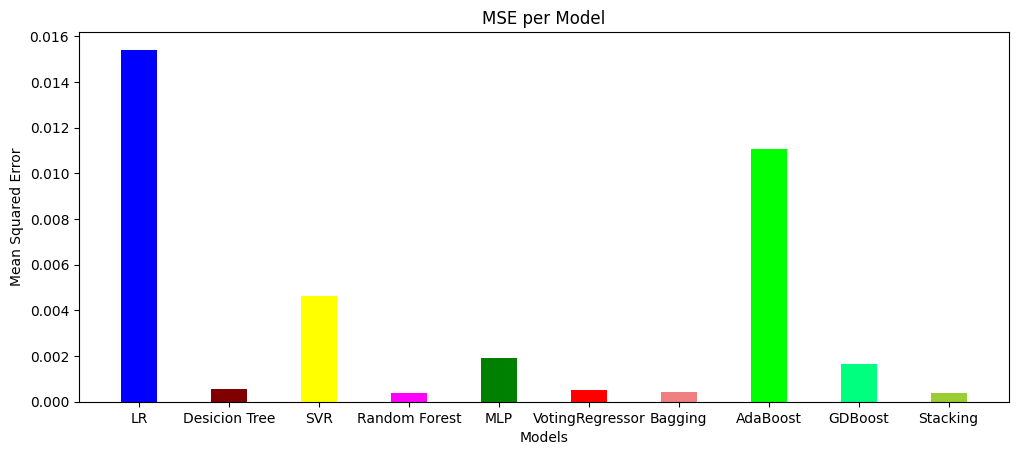

In [60]:
print(mser)
#set width of a figure
f = plt.figure()
f.set_figwidth(12)

plt.bar(['LR','Desicion Tree','SVR','Random Forest','MLP','VotingRegressor','Bagging','AdaBoost','GDBoost','Stacking'],mser,width = 0.4,color=['blue','maroon','yellow','magenta','green','red','lightcoral','lime','springgreen','yellowgreen'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("MSE per Model")
plt.show()

In [61]:
# από εδώ και κάτω δουλεύω το cross validation κομμάτι

import random
def splitting(d,l):
    # συνάρτηση που φτιάχνει 10 ίσους πίνακες numpy με μη επικαλυπτόμενα στοιχεία
    # d: λεξικό που προκύπτει από την ανάθεση ενός αύξοντος αριθμού σε κάθε γραμμή του αρχικού πίνακα
    #l: μήκος του αρχικού πίνακα
    datasets=list()
    for i in range(0,10):
        d1=random.sample(d.keys(),l//10) # τυχαία επιλογή γραμμών χωρίς αντικατάσταση
        d2=list(d.keys()-d1) # επιλογή των υπόλοιπων γραμμ΄ών
        #print(d1,d2) only for testing purposes
        if(i<9):
            d={key:d[key] for key in d2}
            datasets.append(d1)
        else:
            datasets.append((d1+d2))
    return datasets

In [62]:
#testing splitting function
d={1:'a',2:'b',3:'c',4:'d',5:'e',6:'f',7:'g',8:'h',9:'j',10:'k',11:'w'}
datasets_simple=splitting(d,len(d))
print(datasets_simple)
for i in range(0,10):
    print(([d[key] for key in datasets_simple[i][:]]))

[[10], [1], [7], [2], [11], [5], [6], [8], [9], [3, 4]]
['k']
['a']
['g']
['b']
['w']
['e']
['f']
['h']
['j']
['c', 'd']


<ipython-input-61-c5c4fb80c0d6>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  d1=random.sample(d.keys(),l//10) # τυχαία επιλογή γραμμών χωρίς αντικατάσταση


In [63]:
#τώρα πρέπει να δημιουργήσουμε ένα λεξικό για το dataset όπου το κλειδί είναι ο αύξων αριθμός γραμμής
def dataset_to_dict(X,y):
    #μετατρεπει το dataset σε λεξικό με κλειδί τον αύξων αριθμός γραμμής
    #X:input
    #y:output
    dx={}
    dy={}
    for i in range(len(X)):
        dx[i]=X[i]
        dy[i]=y[i]
    return (dx,dy)

In [64]:
(dx,dy)=dataset_to_dict(X,y)
#print(len(dy))
datasets=splitting(dx,len(dx))

<ipython-input-61-c5c4fb80c0d6>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  d1=random.sample(d.keys(),l//10) # τυχαία επιλογή γραμμών χωρίς αντικατάσταση


In [65]:
print(len(datasets[9]))

2132


In [66]:
def scale_fit_predict(X_train,y_train,X_test,y_test):
    #εφαρμόζει τις λειτουργίες του scaling, fitting και predicting, με μοντέλο LR, MinMaxScaling και MSE
    #εναλλακτικά θα μπορούσαν να χρησιμοποιηθούν άλλα μοντέλα και σφάλματα με λίγες αλλαγές
    #scaling
    scaler_data=MinMaxScaler()
    scaler_labels=MinMaxScaler()

    X_train=scaler_data.fit_transform(X_train)
    y_train=scaler_labels.fit_transform(y_train)
    X_test=scaler_data.transform(X_test)
    y_test=scaler_labels.transform(y_test)

    #fit
    model = RandomForestRegressor(n_estimators=200) #create the model
    model.fit(X_train,y_train)

    #predict
    predictions=model.predict(X_test)
    test_mse=mean_squared_error(y_test, predictions)
    train_mse=mean_squared_error(y_train, model.predict(X_train))
    #print('mean_squared_error : ', test_mse)
    return {'train_score':train_mse,'test_score':test_mse}


In [67]:
def cross_validation(dx,dy,datasets):
    #εφαρμόζει το cross validation
    # αρχικά παίρνει 10 λίστες με τις στ΄ήλες που θα αντιστοιχούν στο test set κάθε φορά
    # δημιουργεί τα διαφορετικά test και train set για κάθε επανάληψη
    # καλει την scale_fit_predict για να εφαρμόσει το μοντέλο στα σύνολα δεδομένων που δημιούργησε
    #κρατάει και επιστρέφει τα train και test scores που προκύπτουν από την εκπαίδευση
    # dx,dy: τα λεξικά για τα αντίστοιχα σύνολα δεδομένων, προκύπτουν από την dataset_to_dict
    #datasets: οι λίστες με τις στήλες που χωρίζουν τα δεδομένα μας σε 10 μη επικαλυπτόμενα υποσύνολα. Προκύπτουν από την splitting.
    test_score=[]
    train_score=[]
    # 10 repeats for cross validation
    for i in range(0,10):
        X_test=[dx[key] for key in datasets[i][:]]
        y_test=[dy[key] for key in datasets[i][:]]
        X_train=[]
        y_train=[]
        # to create train set using 9 out of 10 datasets
        for j in range(0,10):
            if(j!=i):
                temp_x=[dx[key] for key in datasets[j][:]]
                temp_y=[dy[key] for key in datasets[j][:]]
                X_train=X_train+temp_x
                y_train=y_train+temp_y
        #print(X_test,X_train) only for testing purposes
        temp_dict=scale_fit_predict(X_train,y_train,X_test,y_test)

        train_score.append(temp_dict['train_score'])
        test_score.append(temp_dict['test_score'])
    return (train_score,test_score)

In [69]:
(train_score, test_score)=cross_validation(dx,dy,datasets)
print('test score: ', test_score)

<ipython-input-66-9f94c9e63aaf>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
<ipython-input-66-9f94c9e63aaf>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
<ipython-input-66-9f94c9e63aaf>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
<ipython-input-66-9f94c9e63aaf>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
<ipython-input-66-9f94c9e63aaf>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

test score:  [0.00041378778760118906, 0.00040621005512072564, 0.0005333841445893854, 0.00034465790347539834, 0.000267801688250032, 0.000307566032353649, 0.0003344239002351589, 0.00034388710905144157, 0.00028735062413623956, 0.0002908882576787952]


In [70]:
print('train_score: ', train_score)

train_score:  [4.4341476023257685e-05, 5.133440455956094e-05, 4.630329286339291e-05, 4.904705221585087e-05, 4.770152472066235e-05, 4.863243093332712e-05, 4.91272803445034e-05, 4.853107859632409e-05, 4.856076653196386e-05, 5.2856297605708974e-05]


In [71]:
import statistics
print(statistics.mean(test_score))

0.00035299575024920146


In [72]:
#GridSearch
from sklearn.model_selection import GridSearchCV
# Ξαναορίζουμε τα X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
#scaling
scaler_data=MinMaxScaler()
scaler_labels=MinMaxScaler()

X_train=scaler_data.fit_transform(X_train)
y_train=scaler_labels.fit_transform(y_train)
X_test=scaler_data.transform(X_test)
y_test=scaler_labels.transform(y_test)
#model definition
#map(lambda x:10**x, range(-5,0))): #map to create a list with numbers from 10**-5 to 0.1
 #   model=MLPRegressor(hidden_layer_sizes=(800,600,400), learning_rate_init=lr)
mlp=MLPRegressor()
#grid search definition #,(800,600,400,200),(800,600,400,200,100)
clf = GridSearchCV(mlp, {'hidden_layer_sizes':[(400,200,100)],'learning_rate_init':[0.1,0.01,0.001,0.0001,0.00001]})
clf.fit(X_train,y_train)
print(clf.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

MLPRegressor(hidden_layer_sizes=(400, 200, 100))


In [73]:
clf.best_estimator_

MLPRegressor(hidden_layer_sizes=(400, 200, 100))

In [74]:
print([0.1,0.01,0.001,0.0001,0.00001])

[0.1, 0.01, 0.001, 0.0001, 1e-05]
